# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

### A

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [25]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/ (tips['total_bill']-tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [26]:
reg1 = smf.ols(' tip ~ net_bill ', data= tips).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           5.02e-23
Time:                        20:00:24   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### B

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

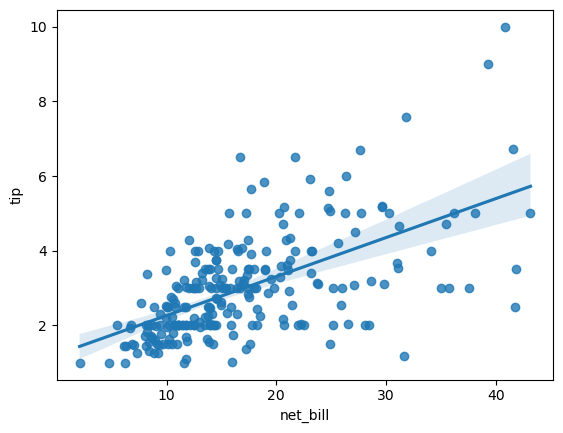

In [27]:
sns.regplot(data=tips[tips['tip_pct']<.5],y='tip',x='net_bill')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [28]:
reg2 = smf.ols(' tip_pct ~ net_bill ', data= tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 08 Jul 2024   Prob (F-statistic):           1.52e-06
Time:                        20:00:25   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

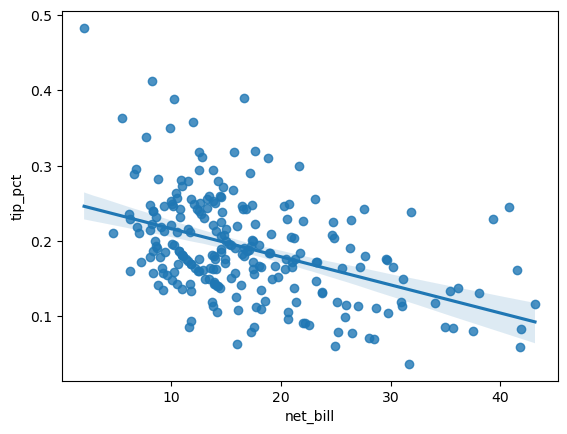

In [29]:
sns.regplot(data=tips[tips['tip_pct']<.5],y='tip_pct',x='net_bill')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

- Acredito que por serem variáveis diferentes o r2 não seria uma relação interessante, outro ponto é que a regressão plotada quandofoi usado a variável 'tip' foi plotada uma regressão simples com coeficiente angular positivo e quando usa-se a 'tip_pct' o coeficiente é negativo, causando uma reta descendente.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [30]:
# Obter os valores preditos para tip_pct
tips['pred_tip_pct'] = reg2.fittedvalues

# Calcular o valor predito para tip
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Calcular o R² para o modelo de tip usando os valores preditos
rss = np.sum((tips['tip'] - tips['pred_tip']) ** 2)
tss = np.sum((tips['tip'] - np.mean(tips['tip'])) ** 2)
r_squared = 1 - (rss / tss)
print(f"R² para o modelo de tip: {r_squared}")

# Comparar o R² com o do item 1
reg1 = smf.ols('tip ~ net_bill', data=tips).fit()
print(f"R² do modelo original de tip: {reg1.rsquared}")


R² para o modelo de tip: 0.10889974845461392
R² do modelo original de tip: 0.3325407312323707


In [31]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,pred_tip_pct,pred_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.207087,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.251951,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.197684,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.180107,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.176358,3.699998
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.163268,3.773120
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.150546,3.790751
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.178264,3.684707
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.206534,3.319003
